# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Weather Analysis and Observations:
* With a moderate correlation between temperature and latitude, you are generally more likely to experience warmer temperatures near the equator.  
* Humidity, cloudiness, and wind speeds have no relationship to latitude with r-squared values at or very near zero.
* Southern hemisphere temperatures are directly proportional to latitude and norhtern hemisphere temperatures are inversely proportional to latitude.  As latitude increases, temperature increases if you are in the southern hemisphere.  As latitude decreases, temperature increases if you are in the northern hemisphere.
* Peak temperatures occur at 20 degrees north of the equator.  Looking at seasonal data would be interesting to investgate the impact of the tilting of the Earth on its axis with respect to the latitude of peak temperatures in different seasons.  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#build dataframe
City_List = []

for city in cities:
    
    City_List.append(city.title())

weather_df = pd.DataFrame({"City": City_List,
                           "Latitude": "",
                           "Longitude": "",
                           "Max Temperature": "",
                           "Humidity": "",
                           "Cloudiness": "",
                           "Wind Speed": "",
                           "Country": "",
                           "DateTime": ""})
                          
weather_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,DateTime
0,Sola,,,,,,,,
1,Limoges,,,,,,,,
2,Cidreira,,,,,,,,
3,Kattivakkam,,,,,,,,
4,Vila Franca Do Campo,,,,,,,,
...,...,...,...,...,...,...,...,...,...
622,Solikamsk,,,,,,,,
623,Ossora,,,,,,,,
624,Morondava,,,,,,,,
625,Gweru,,,,,,,,


In [5]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#perform a weather check on each city
for index, row in weather_df.iterrows():

    # get desired parameters from API
    city_name = row['City']
    weather_url = f"{url}appid={weather_api_key}&q={city_name}&units={units}"
    response = requests.get(weather_url).json()
    
    try:
        print(f"Retrieving Results for record {index}: {city_name}.")
        # Fill in data series with returned response data
        weather_df.loc[index, 'Latitude'] = response['coord']['lat']
        weather_df.loc[index, 'Longitude'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temperature'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'DateTime'] = response['dt']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")        
        
    

Retrieving Results for record 0: Sola.
Retrieving Results for record 1: Limoges.
Retrieving Results for record 2: Cidreira.
Retrieving Results for record 3: Kattivakkam.
Retrieving Results for record 4: Vila Franca Do Campo.
Retrieving Results for record 5: Hobart.
Retrieving Results for record 6: Provideniya.
Retrieving Results for record 7: Punta Arenas.
Retrieving Results for record 8: Tuktoyaktuk.
Retrieving Results for record 9: Broome.
Retrieving Results for record 10: Barrow.
Retrieving Results for record 11: Fairbanks.
Retrieving Results for record 12: Atuona.
Retrieving Results for record 13: Nishihara.
Retrieving Results for record 14: Bluff.
Retrieving Results for record 15: Victoria.
Retrieving Results for record 16: Pisco.
Retrieving Results for record 17: Kapaa.
Retrieving Results for record 18: Vaini.
Retrieving Results for record 19: Turayf.
Retrieving Results for record 20: Albany.
Retrieving Results for record 21: Illoqqortoormiut.
City not found. Skipping...
Retrievi

Retrieving Results for record 173: Cherskiy.
Retrieving Results for record 174: Coahuayana.
Retrieving Results for record 175: Agirish.
Retrieving Results for record 176: Tukrah.
Retrieving Results for record 177: Kovdor.
Retrieving Results for record 178: Paso De Los Toros.
Retrieving Results for record 179: Aloleng.
Retrieving Results for record 180: Mizdah.
Retrieving Results for record 181: Bukachacha.
Retrieving Results for record 182: San Matias.
Retrieving Results for record 183: Sept-Iles.
Retrieving Results for record 184: Kalmunai.
Retrieving Results for record 185: Sao Joao Da Barra.
Retrieving Results for record 186: Samusu.
City not found. Skipping...
Retrieving Results for record 187: Braintree.
Retrieving Results for record 188: Traverse City.
Retrieving Results for record 189: Kaitangata.
Retrieving Results for record 190: Kahului.
Retrieving Results for record 191: Attawapiskat.
City not found. Skipping...
Retrieving Results for record 192: Pilar.
Retrieving Results fo

Retrieving Results for record 343: Warqla.
City not found. Skipping...
Retrieving Results for record 344: Grand-Santi.
Retrieving Results for record 345: Hamilton.
Retrieving Results for record 346: Geraldton.
Retrieving Results for record 347: Auki.
Retrieving Results for record 348: Krasnoyarsk-45.
City not found. Skipping...
Retrieving Results for record 349: Sorvag.
City not found. Skipping...
Retrieving Results for record 350: Fatsa.
Retrieving Results for record 351: Komsomolskiy.
Retrieving Results for record 352: Faridan.
City not found. Skipping...
Retrieving Results for record 353: Farafangana.
Retrieving Results for record 354: Khandyga.
Retrieving Results for record 355: Sydney.
Retrieving Results for record 356: Jinchang.
Retrieving Results for record 357: Hella.
Retrieving Results for record 358: Palmer.
Retrieving Results for record 359: Belyy Yar.
Retrieving Results for record 360: Severo-Yeniseyskiy.
Retrieving Results for record 361: Goderich.
Retrieving Results for r

Retrieving Results for record 514: North Augusta.
Retrieving Results for record 515: Fairmont.
Retrieving Results for record 516: Itacurubi Del Rosario.
Retrieving Results for record 517: Ponta Delgada.
Retrieving Results for record 518: Bullhead City.
Retrieving Results for record 519: Murgab.
Retrieving Results for record 520: Clinton.
Retrieving Results for record 521: Zhigansk.
Retrieving Results for record 522: Batemans Bay.
Retrieving Results for record 523: Minab.
Retrieving Results for record 524: Tilichiki.
Retrieving Results for record 525: Alyangula.
Retrieving Results for record 526: Mendi.
Retrieving Results for record 527: Buckeye.
Retrieving Results for record 528: Qingdao.
Retrieving Results for record 529: Gambo.
Retrieving Results for record 530: Naryan-Mar.
Retrieving Results for record 531: Kirkwall.
Retrieving Results for record 532: Lhokseumawe.
Retrieving Results for record 533: Bose.
Retrieving Results for record 534: Langen.
Retrieving Results for record 535: D

In [6]:
weather_df


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,DateTime
0,Sola,-13.88,167.55,81.21,84,99,19.51,VU,1591198357
1,Limoges,45.75,1.33,68,72,33,8.05,FR,1591198357
2,Cidreira,-30.18,-50.21,62.64,69,21,4.52,BR,1591198357
3,Kattivakkam,13.22,80.32,87.8,74,20,11.41,IN,1591198357
4,Vila Franca Do Campo,37.72,-25.43,66.2,72,40,14.99,PT,1591198358
...,...,...,...,...,...,...,...,...,...
622,Solikamsk,59.62,56.77,54.07,57,0,2.82,RU,1591198469
623,Ossora,59.24,163.07,38.12,81,71,3.89,RU,1591198470
624,Morondava,-20.28,44.28,76.35,67,0,9.62,MG,1591198470
625,Gweru,-19.45,29.82,60.4,39,0,8.84,ZW,1591198470


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Check data types for future analysis
weather_df.dtypes

City               object
Latitude           object
Longitude          object
Max Temperature    object
Humidity           object
Cloudiness         object
Wind Speed         object
Country            object
DateTime           object
dtype: object

In [8]:
# Convert data types as needed for analysis
weather_df["Latitude"] = pd.to_numeric(weather_df["Latitude"])
weather_df["Longitude"] = pd.to_numeric(weather_df["Longitude"])
weather_df["Max Temperature"] = pd.to_numeric(weather_df["Max Temperature"])
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

weather_df.dtypes

City                object
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity           float64
Cloudiness         float64
Wind Speed         float64
Country             object
DateTime            object
dtype: object

In [9]:
# Export file as a CSV
weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,21.435450,14.253086,67.580917,67.409171,52.495591,7.977919
std,33.316292,89.902862,16.353726,20.558332,37.092181,5.225474
min,-54.800000,-175.200000,28.400000,7.000000,0.000000,0.040000
25%,-7.500000,-66.045000,53.625000,56.000000,19.500000,4.115000
50%,26.590000,15.790000,70.480000,71.000000,58.000000,6.930000
75%,49.825000,90.500000,80.305000,83.000000,90.000000,10.300000
max,78.220000,178.420000,111.150000,100.000000,100.000000,28.070000


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity = list(weather_df.loc[weather_df["Humidity"] > 100.0, :].index)
humidity

[]

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_df = weather_df.drop(weather_df[(weather_df["Humidity"] > 100)].index)

clean_weather_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,DateTime
0,Sola,-13.88,167.55,81.21,84.0,99.0,19.51,VU,1591198357
1,Limoges,45.75,1.33,68.00,72.0,33.0,8.05,FR,1591198357
2,Cidreira,-30.18,-50.21,62.64,69.0,21.0,4.52,BR,1591198357
3,Kattivakkam,13.22,80.32,87.80,74.0,20.0,11.41,IN,1591198357
4,Vila Franca Do Campo,37.72,-25.43,66.20,72.0,40.0,14.99,PT,1591198358
...,...,...,...,...,...,...,...,...,...
622,Solikamsk,59.62,56.77,54.07,57.0,0.0,2.82,RU,1591198469
623,Ossora,59.24,163.07,38.12,81.0,71.0,3.89,RU,1591198470
624,Morondava,-20.28,44.28,76.35,67.0,0.0,9.62,MG,1591198470
625,Gweru,-19.45,29.82,60.40,39.0,0.0,8.84,ZW,1591198470


In [14]:
clean_weather_df["Humidity"].max()

100.0

In [15]:
# Extract relevant fields from the data frame
city_data = clean_weather_df.iloc[:, [0,1,3,4,5,6]]
print(city_data)
# Export the City_Data into a csv
city_data.to_csv("../output_data/cityData.csv", index=True, header=True)

                     City  Latitude  Max Temperature  Humidity  Cloudiness  \
0                    Sola    -13.88            81.21      84.0        99.0   
1                 Limoges     45.75            68.00      72.0        33.0   
2                Cidreira    -30.18            62.64      69.0        21.0   
3             Kattivakkam     13.22            87.80      74.0        20.0   
4    Vila Franca Do Campo     37.72            66.20      72.0        40.0   
..                    ...       ...              ...       ...         ...   
622             Solikamsk     59.62            54.07      57.0         0.0   
623                Ossora     59.24            38.12      81.0        71.0   
624             Morondava    -20.28            76.35      67.0         0.0   
625                 Gweru    -19.45            60.40      39.0         0.0   
626              Menongue    -14.66            72.36      30.0        38.0   

     Wind Speed  
0         19.51  
1          8.05  
2        

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

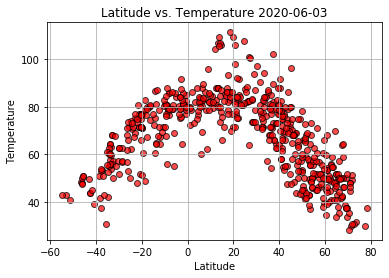

In [16]:
x_axis = city_data["Latitude"]
y_axis = city_data["Max Temperature"]
date = pd.to_datetime('today').date()

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.7)
plt.title(f"Latitude vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig("../output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

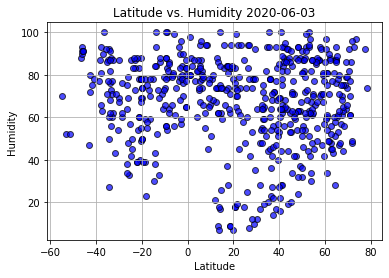

In [17]:
x_axis = city_data["Latitude"]
y_axis = city_data["Humidity"]
date = pd.to_datetime('today').date()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("../output_data/Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

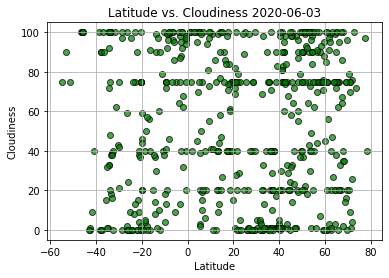

In [18]:
x_axis = city_data["Latitude"]
y_axis = city_data["Cloudiness"]
date = pd.to_datetime('today').date()

plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.7)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("../output_data/Lat_vs_Cld.png")
plt.show()

## Latitude vs. Wind Speed Plot

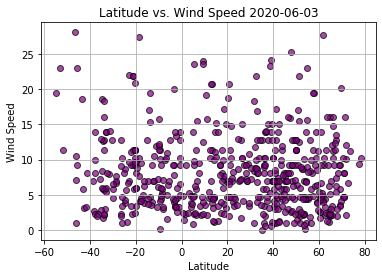

In [19]:
x_axis = city_data["Latitude"]
y_axis = city_data["Wind Speed"]
date = pd.to_datetime('today').date()

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.7)
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../output_data/Lat_vs_WS.png")
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg():
    data = input("Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): ")
    hemisphere = input("Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  ")
    
    if hemisphere == "north":
        x_values = north_city_data["Latitude"]
        y_values = north_city_data[str.title(data)]
    elif hemisphere == "south":
        x_values = south_city_data["Latitude"]
        y_values = south_city_data[str.title(data)]
    else:
        print("I do not know what hemisphere you would like.")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(str.title("Latitude"))
    plt.ylabel(str.title(data))
    plt.title(f"{str.title(data)} vs. Latitude")
    plt.savefig(f"../output_data/{str.title(data)}_vs_Lat")
    plt.show()
    print(f"R squared: {round(rvalue**2, 2)}")


In [21]:
# Create Northern and Southern Hemisphere DataFrames
north_lat = city_data.loc[city_data["Latitude"] > 0, :]
north_city_data = pd.merge(city_data, north_lat, how="inner")
print(north_city_data)
south_lat = city_data.loc[city_data["Latitude"] < 0, :]
south_city_data = pd.merge(city_data, south_lat, how="inner")
south_city_data

                     City  Latitude  Max Temperature  Humidity  Cloudiness  \
0                 Limoges     45.75            68.00      72.0        33.0   
1             Kattivakkam     13.22            87.80      74.0        20.0   
2    Vila Franca Do Campo     37.72            66.20      72.0        40.0   
3             Provideniya     64.38            45.75      58.0         3.0   
4             Tuktoyaktuk     69.45            33.80      74.0        20.0   
..                    ...       ...              ...       ...         ...   
390         Novyy Urengoy     66.08            44.17      63.0        95.0   
391               Terrace     54.52            46.40      87.0        90.0   
392                 Muros     42.78            71.01      86.0        84.0   
393             Solikamsk     59.62            54.07      57.0         0.0   
394                Ossora     59.24            38.12      81.0        71.0   

     Wind Speed  
0          8.05  
1         11.41  
2        

,City,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Sola,-13.88,81.21,84.0,99.0,19.51
1,Cidreira,-30.18,62.64,69.0,21.0,4.52
2,Hobart,-42.88,44.01,80.0,0.0,5.82
3,Punta Arenas,-53.15,42.80,52.0,90.0,23.04
4,Atuona,-9.80,80.92,74.0,4.0,15.73
...,...,...,...,...,...,...
167,Vangaindrano,-23.35,67.37,88.0,8.0,6.67
168,Binga,-17.62,67.14,58.0,0.0,4.18
169,Morondava,-20.28,76.35,67.0,0.0,9.62
170,Gweru,-19.45,60.40,39.0,0.0,8.84


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): Max Temperature
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  north


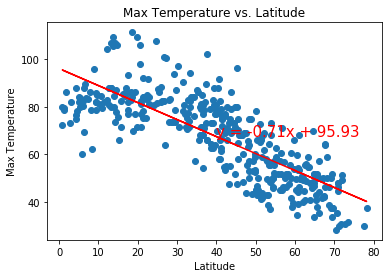

R squared: 0.63


In [22]:
linreg()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): Max Temperature
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  south


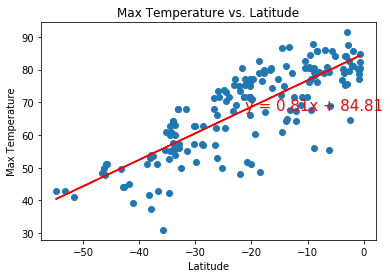

R squared: 0.66


In [23]:
linreg()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): Humidity
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  north


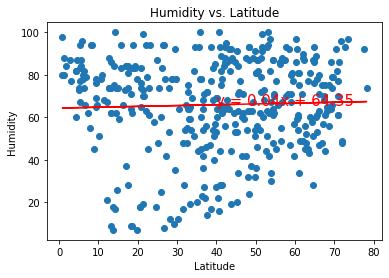

R squared: 0.0


In [24]:
linreg()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): humidity
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  south


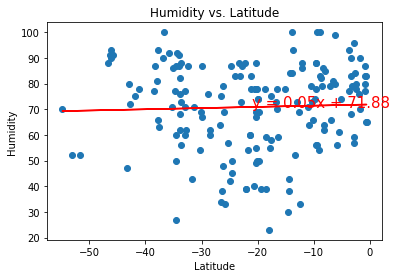

R squared: 0.0


In [25]:
linreg()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): cloudiness
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  north


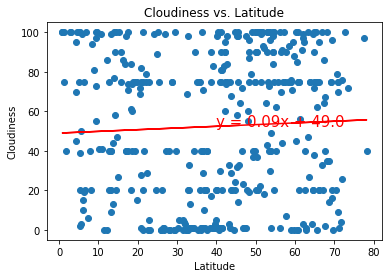

R squared: 0.0


In [26]:
linreg()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): cloudiness
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  south


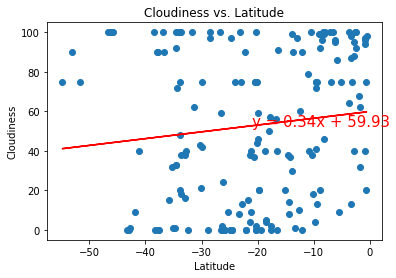

R squared: 0.01


In [27]:
linreg()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): wind speed
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  north


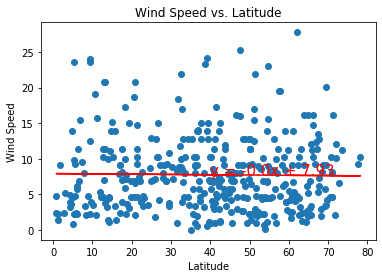

R squared: 0.0


In [28]:
linreg()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Select a column to analyze (Max Temperature, Humidity, Cloudiness, Wind Speed): wind speed
Would you like to plot data from the Northern Hemisphere or Southern Hemisphere? say 'north' or 'south'  south


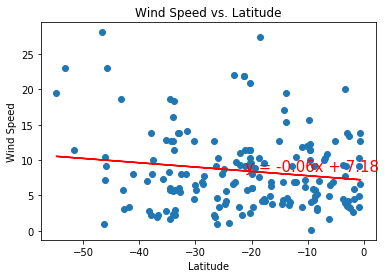

R squared: 0.02


In [29]:
linreg()